#### 1. Thư viện

In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cross_decomposition import CCA
from sklearn.preprocessing import StandardScaler

#### 2. Phân tích mối tương quan giữa các đặc trưng (features)

<Axes: >

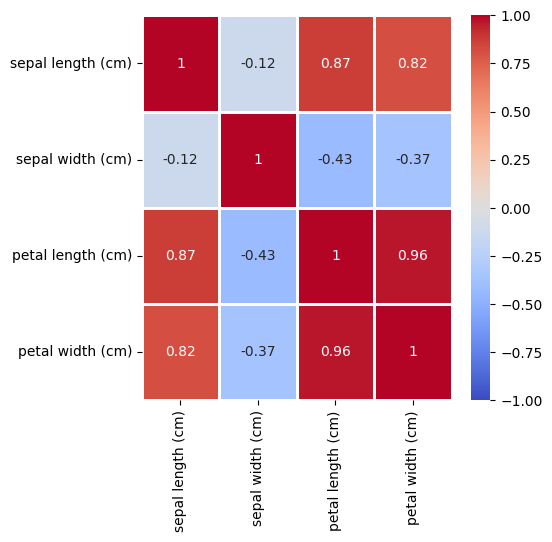

In [2]:
X,_ = load_iris(return_X_y=True, as_frame=True)
corr_coeff = X.corr()
plt.figure(figsize = (5, 5))
sns.heatmap(corr_coeff, cmap='coolwarm', annot=True, linewidths=1, vmin=-1)


#### 3. Thực hiện phân tích CCA


In [3]:
# We will split this dataset into two data frames one containing only sepal-related features and
#one with only petal-related features.
X1 = X.iloc[:, :2] # extract first two columns to create a sepal-related features dataset
X2 = X.iloc[:, 2:] # extract last two columns to create a petal-related features dataset
scaler = StandardScaler()
X1_sc = scaler.fit_transform(X1)
X2_sc = scaler.fit_transform(X2)
n_comp=2 #choose number of canonical variates pairs
cca = CCA(scale=False, n_components=n_comp) #define CCA
cca.fit(X1_sc, X2_sc) #fit our scaled data
X1_c, X2_c = cca.transform(X1_sc, X2_sc) #transform our datasests to obtain canonical variates

#### 4. Kiểm tra mối quan hệ giữa các biến chính tắc

<BarContainer object of 2 artists>

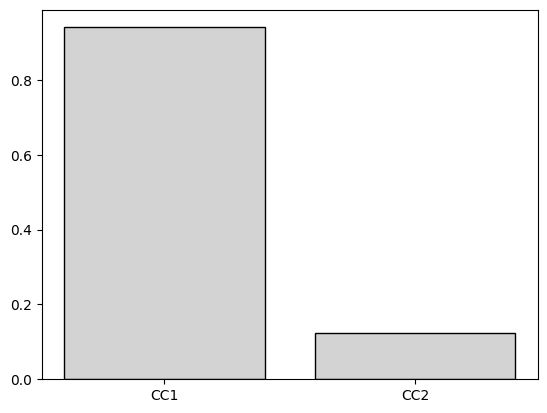

In [4]:
comp_corr = [np.corrcoef(X1_c[:, i], X2_c[:, i])[1][0] for i in range(n_comp)]
plt.bar(['CC1', 'CC2'], comp_corr, color='lightgrey', width = 0.8, edgecolor='k')


#### 5. Phân tích các hệ số tải (loadings) gắn liền với lỗi biến chính tắc của chúng ta.


In [5]:
# Lấy các hệ số tải
x_loadings = cca.x_loadings_
y_loadings = cca.y_loadings_

u_columns = [f'CC{i+1}/U{i+1}' for i in range(n_comp)]
v_columns = [f'CC{i+1}/V{i+1}' for i in range(n_comp)]

# Bảng hệ số tải của X1 (đặc trưng đài hoa)
x_loadings_df = pd.DataFrame(x_loadings, index=X1.columns, columns=u_columns)

print("Bảng Hệ số tải cho đặc trưng đài hoa (X1)")
print(x_loadings_df)
print("\n")

# Bảng cho hệ số tải của X2 (đặc trưng cánh hoa)
y_loadings_df = pd.DataFrame(y_loadings, index=X2.columns, columns=v_columns)

print("Bảng Hệ số tải cho đặc trưng cánh hoa (X2)")
print(y_loadings_df)

Bảng Hệ số tải cho đặc trưng đài hoa (X1)
                     CC1/U1    CC2/U2
sepal length (cm)  0.892246  0.388008
sepal width (cm)  -0.457866  0.921656


Bảng Hệ số tải cho đặc trưng cánh hoa (X2)
                     CC1/V1    CC2/V2
petal length (cm)  1.573225  0.332706
petal width (cm)   1.453533  0.943031


#### 6. Phân tích CCA coefficients.


In [6]:
coef_df = pd.DataFrame(np.round(cca.coef_, 2), columns = [X2.columns])
coef_df.index = X1.columns

print("Bảng Hệ số CCA")
print(coef_df)


Bảng Hệ số CCA
                  petal length (cm) petal width (cm)
sepal length (cm)              1.60            -0.31
sepal width (cm)               1.77             0.28
